###### Analysis of covid-19 effects on crime rates in Atlanta.

Finding covid-19 impacts on crimes and different types of crimes during 2020.

Comparing crime rates from 2016-2020.

How did covid-19 lockdown impact crime rate?

Were there any significant changes in different types of crimes due to covid19?


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
import datetime as dt
import seaborn as sns
import matplotlib.dates as mdates

In [ ]:
#convert dtype for resolve dtypewarning
def convert_dtype(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

In [ ]:
converters={'Occur Date': convert_dtype,'': convert_dtype}

In [3]:
crimes_2016_2019_df = pd.read_csv('data/COBRA-2016-2019.csv')
crimes_2020_1_df = pd.read_csv('data/COBRA-2020-OldRMS-09292020.csv')
crimes_2020_2_df = pd.read_csv('data/COBRA-2020(NEW RMS 9-30 12-31).csv')
crimes_2021_df = pd.read_csv('data/COBRA-2021.csv')
covid19_2020_df = pd.read_csv('data/epicurve_rpt_date.csv')

In [4]:
#Concatenate two or more dataframes
def concat_df(df1,df2,df3=pd.DataFrame(),df4=pd.DataFrame()):
    df = pd.concat([df1, df2, df3, df4], axis=0)
    return df

In [5]:
crimes_df = concat_df(crimes_2016_2019_df, crimes_2020_1_df, crimes_2020_2_df,crimes_2021_df)

In [6]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146716 entries, 0 to 18779
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Report Number            146716 non-null  int64  
 1   Report Date              146716 non-null  object 
 2   Occur Date               146700 non-null  object 
 3   Occur Time               146700 non-null  object 
 4   Possible Date            146199 non-null  object 
 5   Possible Time            146198 non-null  object 
 6   Beat                     146672 non-null  object 
 7   Apartment Office Prefix  2664 non-null    object 
 8   Apartment Number         20807 non-null   object 
 9   Location                 146716 non-null  object 
 10  Shift Occurence          105856 non-null  object 
 11  Location Type            112525 non-null  object 
 12  UCR Literal              146716 non-null  object 
 13  UCR #                    146715 non-null  object 
 14  IBR C

In [7]:
lst_keep_column = ['Report Number', 'Occur Date', 'UCR Literal']

In [8]:
#Drop columns that won't be used
def drop_columns(df):
    df = df.drop(columns=[col for col in df if col not in lst_keep_column], axis=1)
    return df

In [9]:
crimes_df = drop_columns(crimes_df)

In [10]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146716 entries, 0 to 18779
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Report Number  146716 non-null  int64 
 1   Occur Date     146700 non-null  object
 2   UCR Literal    146716 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [11]:
#Drop null and nan values in column
def dropna_df(df,col):
    df = df.dropna(subset=[col],how='all')
    return df

In [12]:
crimes_df = dropna_df(crimes_df,'Occur Date')

In [13]:
crimes_df = dropna_df(crimes_df,'UCR Literal')

In [14]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146700 entries, 0 to 18769
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Report Number  146700 non-null  int64 
 1   Occur Date     146700 non-null  object
 2   UCR Literal    146700 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [15]:
#Show sorted list of unique values
def unique_vals(df, col):
    return sorted(df[col].unique())

In [16]:
unique_vals(crimes_df, 'UCR Literal')

['AGG ASSAULT',
 'AUTO THEFT',
 'BURGLARY',
 'BURGLARY-NONRES',
 'BURGLARY-RESIDENCE',
 'HOMICIDE',
 'LARCENY-FROM VEHICLE',
 'LARCENY-NON VEHICLE',
 'MANSLAUGHTER',
 'ROBBERY',
 'ROBBERY-COMMERCIAL',
 'ROBBERY-PEDESTRIAN',
 'ROBBERY-RESIDENCE']

In [17]:
#Convert date column to datetime
def date_time(df, col):
    df[col] = pd.to_datetime(df[col], errors='coerce')
    return df[col]

In [18]:
date_time(crimes_df, 'Occur Date')

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
18765   2021-11-17
18766   2021-11-18
18767   2021-11-18
18768   2021-11-18
18769   2021-11-18
Name: Occur Date, Length: 146700, dtype: datetime64[ns]

In [19]:
crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146700 entries, 0 to 18769
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Report Number  146700 non-null  int64         
 1   Occur Date     146698 non-null  datetime64[ns]
 2   UCR Literal    146700 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ MB


In [20]:
#Create new column of "Year" from Date column
def col_year(df, col):
    df[col] = pd.DatetimeIndex(df['Occur Date']).year
    return df

In [125]:
#Create new column of "Year-Month" from Date column
def col_year(df, col):
    df[col] = pd.DatetimeIndex(df['Occur Date']).year.month
    return df

In [143]:
crimes_df['yyyy-mm'] = pd.to_datetime(crimes_df['Occur Date']).dt.strftime('%Y-%m')

/tmp/ipykernel_15020/227570352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimes_df['yyyy-mm'] = pd.to_datetime(crimes_df['Occur Date']).dt.strftime('%Y-%m')


In [144]:
crimes_df

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories,month_year,yyyy-mm
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE,2016-01,2016-01
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE,2016-01,2016-01
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE,2016-01,2016-01
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE,2016-01,2016-01
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE,2016-01,2016-01
...,...,...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE,2021-11,2021-11
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE,2021-11,2021-11
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE,2021-11,2021-11
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE,2021-11,2021-11


In [126]:
col_year(crimes_df, 'Year-Month')

AttributeError: 'Int64Index' object has no attribute 'month'

In [22]:
#Create new column of "Month" from Date column
def col_year(df, col):
    df[col] = pd.DatetimeIndex(df['Occur Date']).month
    return df

In [23]:
col_year(crimes_df, 'Month')

,Report Number,Occur Date,UCR Literal,Year,Month
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0
...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0


In [24]:
#Select "Occur Date" range starting at 2016-01-01
crimes_df = crimes_df[crimes_df['Occur Date'] >= '2016-01-01']

In [25]:
#Create new column of Month as String format mmm
def col_mmm(df, col):
    df[col] = df['Occur Date'].dt.strftime('%b')
    return df

In [26]:
col_mmm(crimes_df, 'MMM')

/tmp/ipykernel_15020/1714475895.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df['Occur Date'].dt.strftime('%b')


,Report Number,Occur Date,UCR Literal,Year,Month,MMM
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan
...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov


In [27]:
def list_col(df, col):
    return sorted(df[col].unique())

In [28]:
list_col(crimes_df, 'UCR Literal')

['AGG ASSAULT',
 'AUTO THEFT',
 'BURGLARY',
 'BURGLARY-NONRES',
 'BURGLARY-RESIDENCE',
 'HOMICIDE',
 'LARCENY-FROM VEHICLE',
 'LARCENY-NON VEHICLE',
 'MANSLAUGHTER',
 'ROBBERY',
 'ROBBERY-COMMERCIAL',
 'ROBBERY-PEDESTRIAN',
 'ROBBERY-RESIDENCE']

#Creating New crime categories column

In [29]:
new_type_name = [
'LARCENY_FROM_VEHICLE',
'LARCENY_NON_VEHICLE',
'AUTO_THEFT',
'BURGLARY',
'AGG_ASSAULT',
'ROBBERY',
'HOMICIDE',
'MANSLAUGHTER']

HOMICIDE =  ['HOMICIDE']
AGG_ASSAULT = ['AGG ASSAULT']
MANSLAUGHTER = ['MANSLAUGHTER']
AUTO_THEFT = ['AUTO THEFT']
LARCENY_FROM_VEHICLE = ['LARCENY-FROM VEHICLE']
LARCENY_NON_VEHICLE = ['LARCENY-NON VEHICLE']
BURGLARY = ['BURGLARY-RESIDENCE', 'BURGLARY-NONRES', 'BURGLARY']
ROBBERY = ['ROBBERY', 'ROBBERY-PEDESTRIAN', 'ROBBERY-COMMERCIAL', 'ROBBERY-RESIDENCE']

new_type_cat = [
LARCENY_FROM_VEHICLE,
LARCENY_NON_VEHICLE,
AUTO_THEFT,
BURGLARY,
AGG_ASSAULT,
ROBBERY,
HOMICIDE,
MANSLAUGHTER]

In [30]:
def new_crime_cat(df):
# Here is the process of re-categorize the type of crime
    new_dic = {}
    for old_cat, str_name in zip(new_type_cat, new_type_name):
        for a, b in zip(old_cat, [str_name]*len(old_cat)):
            new_dic.update([(a, b)])
#Apply the dict to to df to create new categorial column and variable
    new_dic
    df['Crime Categories'] = None
    df['Crime Categories'] = df['UCR Literal'].map(new_dic)
    return df

In [31]:
new_crime_cat(crimes_df)

/tmp/ipykernel_15020/19276103.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime Categories'] = None
/tmp/ipykernel_15020/19276103.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime Categories'] = df['UCR Literal'].map(new_dic)


,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE


In [32]:
crimes_df

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE


In [33]:
#Select date range with date format as 'yyyy-mm-dd'
def range_df(df, start_date, end_date):
    mask = (df['Occur Date'] >= start_date) & (df['Occur Date'] < end_date)
    return df.loc[mask]

In [34]:
crimes_2016_2019_df = range_df(crimes_df, '2016-01-01', '2020-01-01')

In [35]:
crimes_2016_2019_df.tail()

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
8,211542057,2018-07-13,LARCENY-FROM VEHICLE,2018.0,7.0,Jul,LARCENY_FROM_VEHICLE
9,211608018,2018-07-31,LARCENY-NON VEHICLE,2018.0,7.0,Jul,LARCENY_NON_VEHICLE
10,211950729,2019-04-01,BURGLARY,2019.0,4.0,Apr,BURGLARY
11,210631781,2019-07-01,LARCENY-NON VEHICLE,2019.0,7.0,Jul,LARCENY_NON_VEHICLE
12,212261141,2019-08-14,LARCENY-NON VEHICLE,2019.0,8.0,Aug,LARCENY_NON_VEHICLE


In [36]:
crimes_2016_2020_df = range_df(crimes_df, '2016-01-01', '2021-01-01')

In [37]:
#Select "Year" range starting at year
crimes_2016_2019_df = crimes_df[crimes_df['Year'] < 2020]

In [38]:
#Select "Year" range starting at year
crimes_2019_df = crimes_df[crimes_df['Year'] == 2019]

In [39]:
#Select "Year" range starting at year
crimes_2020_df = crimes_df[crimes_df['Year'] == 2020]

In [40]:
crimes_2021_df = crimes_df[crimes_df['Year'] == 2021]

Total Number of Crime per Year

In [41]:
crimes_2016_2020_df= crimes_df[crimes_df['Occur Date'] < '2021-01-01']

In [42]:
#Bar Plot of Total Crimes Per "Year"
def plot_bar_total_crimes_year(df, col):
    fig, ax = plt.subplots(figsize=[7,6])
    ax = sns.barplot(x=df[col].value_counts().index.tolist(), y=df[col].value_counts().values)
    plt.title('Total Crimes in Atlanta Per Year (2016-2020)', fontsize = 20)
    plt.ylabel('Number of Crimes', fontsize = 15)
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.bar_label(ax.containers[0],size=13)
    fig.tight_layout()
    #plt.savefig('images/Total Crimes in Atlanta Per Year (2016-2020)', dpi=100)

In [43]:
def plot_count_crimes_cat_year(df):
    fig, ax = plt.subplots(figsize=[8.5, 6])
    ax = sns.countplot(y = df['Crime Categories'], data = df, order = df['Crime Categories'].value_counts().index)
    ax.title((input('Fig Title: '), fontsize = 20)
    ax.xlabel('Number of Crimes', fontsize = 15)
    ax.ylabel('Crime Categories', fontsize = 15)
    ax.xticks(fontsize = 9)
    ax.yticks(fontsize = 9)
    ax.bar_label(ax.containers[0],size=8)
    fig.tight_layout()

SyntaxError: invalid syntax (1438899202.py, line 4)

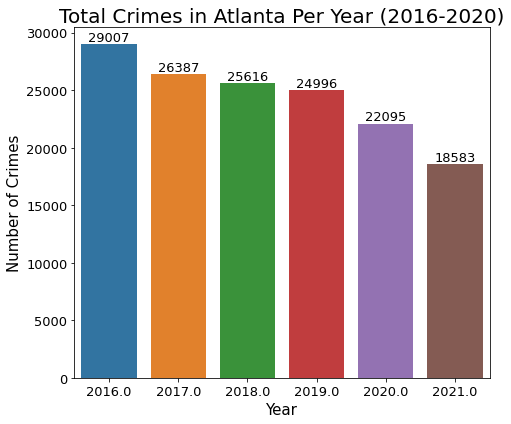

In [44]:
plot_bar_total_crimes_year(crimes_df, "Year")

In [45]:
#Bar Plot of Crime categories
def plot_bar_crimes_cat_year(df):
    fig, ax = plt.subplots(figsize=[8.5, 6])
    ax = sns.countplot(y = df['Crime Categories'], data = df, order = df['Crime Categories'].value_counts().index)
    plt.title('Crimes in Atlanta (2020)', fontsize = 20)
    plt.xlabel('Number of Crimes', fontsize = 15)
    plt.ylabel('Crime Categories', fontsize = 15)
    plt.xticks(fontsize = 9)
    plt.yticks(fontsize = 9)
    plt.bar_label(ax.containers[0],size=8)
    #plt.savefig('images/Crimes in Atlanta (2020)', dpi=100, bbox_inches = "tight")

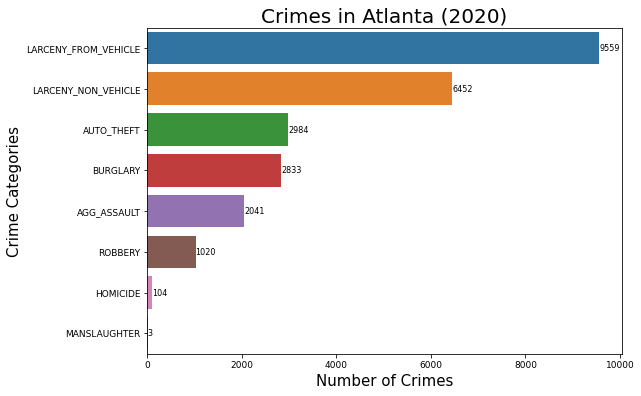

In [46]:
plot_bar_crimes_cat_year(crimes_2019_df)

In [47]:
#Count Plot of Total Crimes in each Month
def plot_count_total_crimes_monthly(df):
    fig, ax = plt.subplots(figsize=[8, 6])
    ax = sns.countplot(x=df['MMM'])
    plt.title(input('Input Chart Title: '), fontsize = 20)
    plt.ylabel('Number of Crimes', fontsize = 15)
    plt.xlabel('Month', fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)
    plt.bar_label(ax.containers[0],size=13)
    fig.tight_layout()
    #plt.savefig('images/Crimes in each Month', dpi=100)

Input Chart Title: 


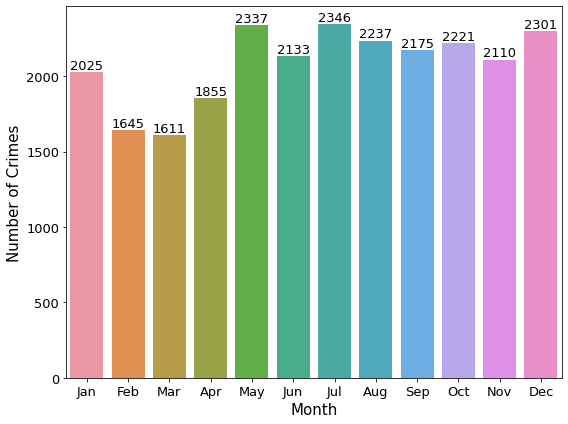

In [48]:
plot_count_total_crimes_monthly(crimes_2019_df)

In [49]:
crimes_df.groupby(['Occur Date'])['UCR Literal'].count().reset_index(name="Total Daily Report")

,Occur Date,Total Daily Report
0,2016-01-01,81
1,2016-01-02,82
2,2016-01-03,69
3,2016-01-04,71
4,2016-01-05,72
...,...,...
2144,2021-11-14,54
2145,2021-11-15,56
2146,2021-11-16,49
2147,2021-11-17,47


In [50]:
crimes_df

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE


In [51]:
def total_crime_daily(df,date_col,cat_col,new_col):
    df = df.groupby([date_col])[cat_col].count().reset_index(name=new_col)
    return df

In [52]:
new_df = total_crime_daily(crimes_df,"Occur Date", "Crime Categories", "Total")

In [53]:
new_df.head()

,Occur Date,Total
0,2016-01-01,81
1,2016-01-02,82
2,2016-01-03,69
3,2016-01-04,71
4,2016-01-05,72


In [54]:
total_daily_report_df = crimes_2020_df.groupby('Occur Date')["Report Number"].count().reset_index(name="Total Daily Report")

In [55]:
total_daily_report_df.head()

,Occur Date,Total Daily Report
0,2020-01-01,74
1,2020-01-02,49
2,2020-01-03,83
3,2020-01-04,75
4,2020-01-05,57


In [56]:
#Get rolling mean
def rolling_avg(df,col1,col2,num):
    df[col1] = df[col2].rolling(num).mean()
    return df

In [57]:
rolling_avg(new_df,"30 Day Avg", "Total", 30)

,Occur Date,Total,30 Day Avg
0,2016-01-01,81,NaN
1,2016-01-02,82,NaN
2,2016-01-03,69,NaN
3,2016-01-04,71,NaN
4,2016-01-05,72,NaN
...,...,...,...
2144,2021-11-14,54,64.166667
2145,2021-11-15,56,63.600000
2146,2021-11-16,49,63.366667
2147,2021-11-17,47,62.366667


In [58]:
new_df.head()

,Occur Date,Total,30 Day Avg
0,2016-01-01,81,NaN
1,2016-01-02,82,NaN
2,2016-01-03,69,NaN
3,2016-01-04,71,NaN
4,2016-01-05,72,NaN


In [59]:
new_df['7 Day Avg'] = new_df['Total'].rolling(7).mean()

In [60]:
new_df.head()

,Occur Date,Total,30 Day Avg,7 Day Avg
0,2016-01-01,81,NaN,NaN
1,2016-01-02,82,NaN,NaN
2,2016-01-03,69,NaN,NaN
3,2016-01-04,71,NaN,NaN
4,2016-01-05,72,NaN,NaN


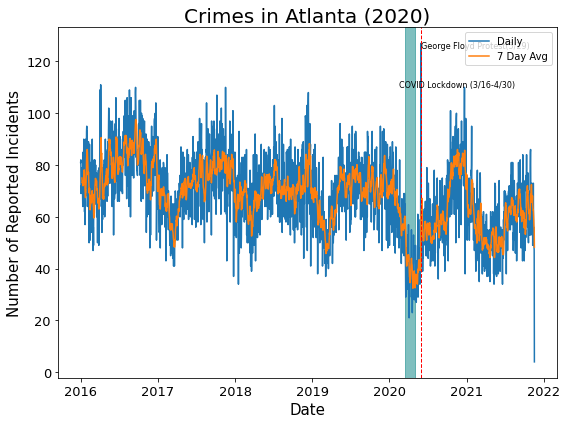

In [61]:
#Line Plot of Crimes in Atlanta (2020)
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x= new_df['Occur Date'], y= new_df['Total'], label="Daily")
sns.lineplot(x= new_df['Occur Date'], y= new_df['7 Day Avg'], label="7 Day Avg")
ax.set_ylabel('Number of Reported Incidents', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_title('Crimes in Atlanta (2020)', fontsize = 20)
ax.axvline([dt.datetime(2020,5,29)], linestyle='--', color='red', lw=1)
plt.text([dt.datetime(2020,2,15)], 110, 'COVID Lockdown (3/16-4/30)', fontsize= 8)
plt.text([dt.datetime(2020,6,1)], 125, 'George Floyd Protest(5/29)', fontsize= 8)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.axvspan(dt.datetime(2020,3,15), dt.datetime(2020,4,30), color='teal', alpha=0.5)
fig.tight_layout()
#plt.savefig('images/Crimes in Atlanta (2020)', dpi=100)

In [62]:
total_crime_report_df = crimes_df.groupby('Occur Date')["Report Number"].count().reset_index(name="Total Daily Report")

In [63]:
total_crime_report_df.head()

,Occur Date,Total Daily Report
0,2016-01-01,81
1,2016-01-02,82
2,2016-01-03,69
3,2016-01-04,71
4,2016-01-05,72


In [64]:
total_crime_report_df['30 Day Avg'] = total_crime_report_df['Total Daily Report'].rolling(30).mean()

In [65]:
total_crime_report_df.head(15)

,Occur Date,Total Daily Report,30 Day Avg
0,2016-01-01,81,NaN
1,2016-01-02,82,NaN
2,2016-01-03,69,NaN
3,2016-01-04,71,NaN
4,2016-01-05,72,NaN
5,2016-01-06,71,NaN
6,2016-01-07,79,NaN
7,2016-01-08,74,NaN
8,2016-01-09,76,NaN
9,2016-01-10,71,NaN


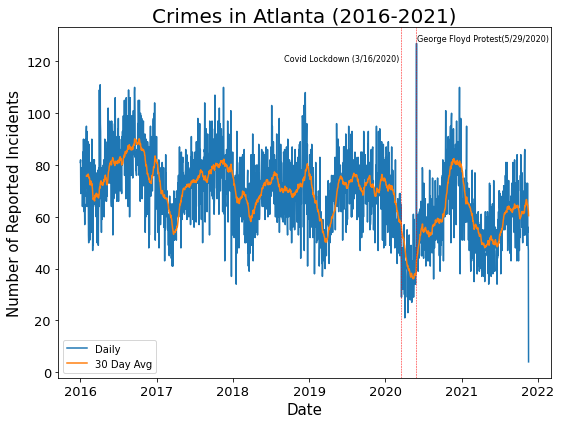

In [66]:
fig, ax = plt.subplots(figsize = (8,6))
sns.lineplot(x = new_df['Occur Date'], y = new_df['Total'], label="Daily")
sns.lineplot(x = new_df['Occur Date'], y = new_df['30 Day Avg'], label="30 Day Avg")
ax.set_ylabel('Number of Reported Incidents', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_title('Crimes in Atlanta (2016-2021)', fontsize = 20)
ax.axvline([dt.datetime(2020,3,16)], linestyle='--', color='red', lw=.5)
ax.axvline([dt.datetime(2020,5,29)], linestyle='--', color='red', lw=.5)
plt.text([dt.datetime(2018,9,1)], 120, 'Covid Lockdown (3/16/2020)', fontsize= 8)
plt.text([dt.datetime(2020,6,1)], 128, 'George Floyd Protest(5/29/2020)', fontsize= 8)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(loc='lower left')
fig.tight_layout()
#plt.savefig('images/Crimes in Atlanta (2016-2021)', dpi=100)

In [67]:
crimes_stats_df = crimes_stats_df.sort_index(axis=0)

NameError: name 'crimes_stats_df' is not defined

In [ ]:
crimes_stats_df.drop(crimes_stats_df.iloc[:, 1:], inplace = True, axis = 1)

In [68]:
crimes_stats_df.rename(columns={'Report Number': '4-year avg'}, inplace=True)

NameError: name 'crimes_stats_df' is not defined

In [69]:
crimes_stats_df.head(15)

NameError: name 'crimes_stats_df' is not defined

In [70]:
crimes_stats_2020_df = crimes_2020_df.groupby(['Crime Categories']).count()

In [71]:
crimes_stats_2020_df =crimes_stats_2020_df.sort_index(axis=0)

In [72]:
crimes_stats_2020_df.drop(crimes_stats_2020_df.iloc[:, 1:], inplace = True, axis = 1)

In [73]:
crimes_stats_2020_df.rename(columns={'Report Number': '2020'}, inplace=True)

In [74]:
crimes_stats_2020_df.head(15)

,2020
Crime Categories,
AGG_ASSAULT,2340
AUTO_THEFT,3275
BURGLARY,2102
HOMICIDE,145
LARCENY_FROM_VEHICLE,8625
LARCENY_NON_VEHICLE,4722
MANSLAUGHTER,2
ROBBERY,884


In [75]:
crimes_stats_all_df= pd.concat([crimes_stats_df, crimes_stats_2020_df.reindex(crimes_stats_df.index)], axis=1)

NameError: name 'crimes_stats_df' is not defined

In [76]:
crimes_stats_all_df.head(15)

NameError: name 'crimes_stats_all_df' is not defined

In [77]:
crimes_stats_all_df['4-year avg'] = crimes_stats_all_df['4-year avg'] /4

NameError: name 'crimes_stats_all_df' is not defined

In [78]:
crimes_stats_all_df['diff'] = crimes_stats_all_df['2020'] - crimes_stats_all_df['4-year avg']

NameError: name 'crimes_stats_all_df' is not defined

In [79]:
crimes_stats_all_df.head(15)

NameError: name 'crimes_stats_all_df' is not defined

In [80]:
crimes_stats_all_df.loc['TOTAL']= crimes_stats_all_df.sum(numeric_only=True, axis=0)

NameError: name 'crimes_stats_all_df' is not defined

In [81]:
crimes_stats_all_df['%_diff'] = crimes_stats_all_df['diff'] / crimes_stats_all_df['4-year avg'] *100

NameError: name 'crimes_stats_all_df' is not defined

In [82]:
crimes_stats_all_df.head(10)

NameError: name 'crimes_stats_all_df' is not defined

In [83]:
covid19_2020_df.head()

,measure,county,report_date,cases,deaths,cases_cum,death_cum,moving_avg_cases,moving_avg_deaths,antigen_cases,probable_deaths,antigen_case_hospitalization,confirmed_case_hospitalization,antigen_cases_cum,probable_deaths_cum,total_cases,total_cases_cum,moving_avg_antigen_cases,moving_avg_probable_deaths,moving_avg_total_cases
0,state_total,Georgia,2020-02-01,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,state_total,Georgia,2020-02-02,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,state_total,Georgia,2020-02-03,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,state_total,Georgia,2020-02-04,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,state_total,Georgia,2020-02-05,0,0,0,0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [84]:
def filt_column(df, col, value):
    df = df[df[col] == value]
    return df

In [85]:
filt_column(covid19_2020_df, "county", "Fulton")

,measure,county,report_date,cases,deaths,cases_cum,death_cum,moving_avg_cases,moving_avg_deaths,antigen_cases,probable_deaths,antigen_case_hospitalization,confirmed_case_hospitalization,antigen_cases_cum,probable_deaths_cum,total_cases,total_cases_cum,moving_avg_antigen_cases,moving_avg_probable_deaths,moving_avg_total_cases
39660,county_stats,Fulton,2020-02-01,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
39661,county_stats,Fulton,2020-02-02,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
39662,county_stats,Fulton,2020-02-03,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
39663,county_stats,Fulton,2020-02-04,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
39664,county_stats,Fulton,2020-02-05,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40316,county_stats,Fulton,2021-11-18,99,1,112686,1670,79.571429,1.571429,33,0,0,6,20878,148,132,133564,19.285714,0.285714,98.857143
40317,county_stats,Fulton,2021-11-19,119,3,112805,1673,83.714286,1.857143,19,0,0,4,20897,148,138,133702,18.285714,0.285714,102.000000
40318,county_stats,Fulton,2021-11-20,75,3,112880,1676,82.857143,2.285714,14,2,1,1,20911,150,89,133791,18.000000,0.571429,100.857143
40319,county_stats,Fulton,2021-11-21,63,0,112943,1676,84.571429,2.000000,6,0,0,2,20917,150,69,133860,16.714286,0.571429,101.285714


In [86]:
fulton_df.head()

NameError: name 'fulton_df' is not defined

In [87]:
new_covid19_2020_df = covid19_2020_df[covid19_2020_df["county"] == "Fulton"]

In [110]:
new_covid19_2020_df

,measure,county,report_date,cases,deaths,cases_cum,death_cum,moving_avg_cases,moving_avg_deaths,antigen_cases,probable_deaths,antigen_case_hospitalization,confirmed_case_hospitalization,antigen_cases_cum,probable_deaths_cum,total_cases,total_cases_cum,moving_avg_antigen_cases,moving_avg_probable_deaths,moving_avg_total_cases,Month
39660,county_stats,Fulton,2020-02-01,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39661,county_stats,Fulton,2020-02-02,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39662,county_stats,Fulton,2020-02-03,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39663,county_stats,Fulton,2020-02-04,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39664,county_stats,Fulton,2020-02-05,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39990,county_stats,Fulton,2020-12-27,209,0,48890,718,486.571429,1.857143,26,0,1,15,5335,46,235,54225,69.285714,0.000000,555.857143,Dec
39991,county_stats,Fulton,2020-12-28,266,0,49156,718,485.142857,1.857143,38,0,0,22,5373,46,304,54529,70.857143,0.000000,556.000000,Dec
39992,county_stats,Fulton,2020-12-29,620,1,49776,719,452.285714,1.857143,123,2,0,43,5496,48,743,55272,67.285714,0.285714,519.571429,Dec
39993,county_stats,Fulton,2020-12-30,412,6,50188,725,458.857143,1.857143,106,0,0,22,5602,48,518,55790,68.285714,0.285714,527.142857,Dec


In [109]:
def col_month(df, col1, col2):
    df[col1] = pd.DatetimeIndex(df[col2]).month
    return df

In [111]:
col_month(new_covid19_2020_df, 'month', 'report_date' )

,measure,county,report_date,cases,deaths,cases_cum,death_cum,moving_avg_cases,moving_avg_deaths,antigen_cases,probable_deaths,antigen_case_hospitalization,confirmed_case_hospitalization,antigen_cases_cum,probable_deaths_cum,total_cases,total_cases_cum,moving_avg_antigen_cases,moving_avg_probable_deaths,moving_avg_total_cases,Month,month
39660,county_stats,Fulton,2020-02-01,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb,2
39661,county_stats,Fulton,2020-02-02,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb,2
39662,county_stats,Fulton,2020-02-03,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb,2
39663,county_stats,Fulton,2020-02-04,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb,2
39664,county_stats,Fulton,2020-02-05,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39990,county_stats,Fulton,2020-12-27,209,0,48890,718,486.571429,1.857143,26,0,1,15,5335,46,235,54225,69.285714,0.000000,555.857143,Dec,12
39991,county_stats,Fulton,2020-12-28,266,0,49156,718,485.142857,1.857143,38,0,0,22,5373,46,304,54529,70.857143,0.000000,556.000000,Dec,12
39992,county_stats,Fulton,2020-12-29,620,1,49776,719,452.285714,1.857143,123,2,0,43,5496,48,743,55272,67.285714,0.285714,519.571429,Dec,12
39993,county_stats,Fulton,2020-12-30,412,6,50188,725,458.857143,1.857143,106,0,0,22,5602,48,518,55790,68.285714,0.285714,527.142857,Dec,12


In [88]:
date_time(new_covid19_2020_df, 'report_date').head()

/tmp/ipykernel_15020/2234250853.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col], errors='coerce')


39660   2020-02-01
39661   2020-02-02
39662   2020-02-03
39663   2020-02-04
39664   2020-02-05
Name: report_date, dtype: datetime64[ns]

In [89]:
new_covid19_2020_df = new_covid19_2020_df[new_covid19_2020_df['report_date'] < '2021-01-01']

In [114]:
#Count Plot of Covid in each Month
def plot_line_graph(df,colx,coly):
    fig, ax = plt.subplots(figsize = (8,6))
    ax = sns.lineplot(x = df[colx], y = df[coly])
    ax.set_ylabel('Daily Reported Cases', fontsize = 15)
    ax.set_xlabel('Month (2020)', fontsize = 15)
    ax.set_title(input('Fig Title: '), fontsize = 20)
    plt.xticks(fontsize = 11)
    plt.yticks(fontsize = 13)
    plt.grid()
    fig.tight_layout()
    plt.savefig('images/Fulton County, GA Monthly Covid-19 Cases Line Graph', dpi=100)

Fig Title: Fulton County, GA Monthly Covid-19 Cases Line Graph


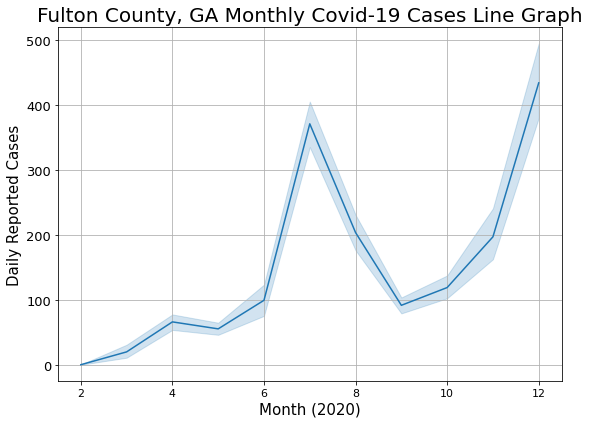

In [115]:
plot_line_graph(new_covid19_2020_df, "month", "cases")

In [92]:
new_covid19_2020_df['Month'] = new_covid19_2020_df['report_date'].dt.strftime('%b')

In [93]:
def col_mmm(df, col1, col2):
    df[col1] = df[col2].dt.strftime('%b')
    return df

In [94]:
col_mmm(new_covid19_2020_df, "Month", "report_date")

,measure,county,report_date,cases,deaths,cases_cum,death_cum,moving_avg_cases,moving_avg_deaths,antigen_cases,probable_deaths,antigen_case_hospitalization,confirmed_case_hospitalization,antigen_cases_cum,probable_deaths_cum,total_cases,total_cases_cum,moving_avg_antigen_cases,moving_avg_probable_deaths,moving_avg_total_cases,Month
39660,county_stats,Fulton,2020-02-01,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39661,county_stats,Fulton,2020-02-02,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39662,county_stats,Fulton,2020-02-03,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39663,county_stats,Fulton,2020-02-04,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
39664,county_stats,Fulton,2020-02-05,0,0,0,0,0.000000,0.000000,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39990,county_stats,Fulton,2020-12-27,209,0,48890,718,486.571429,1.857143,26,0,1,15,5335,46,235,54225,69.285714,0.000000,555.857143,Dec
39991,county_stats,Fulton,2020-12-28,266,0,49156,718,485.142857,1.857143,38,0,0,22,5373,46,304,54529,70.857143,0.000000,556.000000,Dec
39992,county_stats,Fulton,2020-12-29,620,1,49776,719,452.285714,1.857143,123,2,0,43,5496,48,743,55272,67.285714,0.285714,519.571429,Dec
39993,county_stats,Fulton,2020-12-30,412,6,50188,725,458.857143,1.857143,106,0,0,22,5602,48,518,55790,68.285714,0.285714,527.142857,Dec


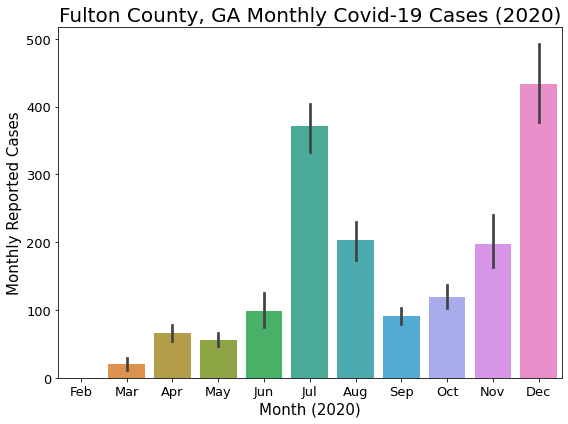

In [95]:
#Bar Plot of Covid Cases in each Month (2020)
fig, ax = plt.subplots(figsize=[8, 6])
ax = sns.barplot(x=new_covid19_2020_df['Month'], y = new_covid19_2020_df['cases'])
ax.set_ylabel('Monthly Reported Cases', fontsize = 15)
ax.set_xlabel('Month (2020)', fontsize = 15)
ax.set_title('Fulton County, GA Monthly Covid-19 Cases (2020)', fontsize = 20)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
fig.tight_layout()
#plt.savefig('images/Fulton County, GA Monthly Covid-19 Cases (2020)', dpi=100)

In [96]:
type_crimes_2020_df = crimes_2020_df.groupby(["Month", "Crime Categories"]).head()

In [97]:
type_crimes_2020_df.tail(10)

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
4939,203361191,2020-12-01,BURGLARY,2020.0,12.0,Dec,BURGLARY
4944,203361374,2020-12-01,AGG ASSAULT,2020.0,12.0,Dec,AGG_ASSAULT
4954,203361631,2020-12-01,AGG ASSAULT,2020.0,12.0,Dec,AGG_ASSAULT
4959,203360107,2020-12-01,HOMICIDE,2020.0,12.0,Dec,HOMICIDE
4967,203360661,2020-12-01,AGG ASSAULT,2020.0,12.0,Dec,AGG_ASSAULT
5012,203371253,2020-12-02,ROBBERY,2020.0,12.0,Dec,ROBBERY
5037,203370129,2020-12-02,ROBBERY,2020.0,12.0,Dec,ROBBERY
5106,203381424,2020-12-03,ROBBERY,2020.0,12.0,Dec,ROBBERY
5110,203380074,2020-12-03,ROBBERY,2020.0,12.0,Dec,ROBBERY
5143,203390134,2020-12-04,HOMICIDE,2020.0,12.0,Dec,HOMICIDE


In [98]:
def unique_vals(df, col):
    return sorted(df[col].unique())

In [99]:
cat_crime = unique_vals(type_crimes_2020_df, "Crime Categories")

In [100]:
cat_crime

['AGG_ASSAULT',
 'AUTO_THEFT',
 'BURGLARY',
 'HOMICIDE',
 'LARCENY_FROM_VEHICLE',
 'LARCENY_NON_VEHICLE',
 'MANSLAUGHTER',
 'ROBBERY']

In [116]:
crimes_df

,Report Number,Occur Date,UCR Literal,Year,Month,MMM,Crime Categories
0,160011550,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
1,160011569,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
2,160011645,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
3,160011823,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
4,160011975,2016-01-01,LARCENY-NON VEHICLE,2016.0,1.0,Jan,LARCENY_NON_VEHICLE
...,...,...,...,...,...,...,...
18765,213220373,2021-11-17,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18766,213220021,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18767,213220048,2021-11-18,LARCENY-FROM VEHICLE,2021.0,11.0,Nov,LARCENY_FROM_VEHICLE
18768,213220150,2021-11-18,LARCENY-NON VEHICLE,2021.0,11.0,Nov,LARCENY_NON_VEHICLE


In [102]:
type_crimes_df = crimes_2020_df.groupby(["Month","Crime Categories"])["Report Number"].count().reset_index(name="count")

In [145]:
all_type_crimes_df = crimes_df.groupby(["yyyy-mm", "Crime Categories"])["Report Number"].count().reset_index(name="count")

In [146]:
all_type_crimes_df

,yyyy-mm,Crime Categories,count
0,2016-01,AGG_ASSAULT,150
1,2016-01,AUTO_THEFT,304
2,2016-01,BURGLARY,439
3,2016-01,HOMICIDE,9
4,2016-01,LARCENY_FROM_VEHICLE,711
...,...,...,...
496,2021-11,BURGLARY,102
497,2021-11,HOMICIDE,8
498,2021-11,LARCENY_FROM_VEHICLE,468
499,2021-11,LARCENY_NON_VEHICLE,185


In [211]:
all_type_crimes_df['yyyy-mm'] = pd.to_datetime(all_type_crimes_df['yyyy-mm'])

In [212]:
all_type_crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   yyyy-mm           501 non-null    datetime64[ns]
 1   Crime Categories  501 non-null    object        
 2   count             501 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.9+ KB


In [103]:
type_crimes_df.head(20)


,Month,Crime Categories,count
0,1.0,AGG_ASSAULT,129
1,1.0,AUTO_THEFT,273
2,1.0,BURGLARY,202
3,1.0,HOMICIDE,5
4,1.0,LARCENY_FROM_VEHICLE,947
5,1.0,LARCENY_NON_VEHICLE,569
6,1.0,ROBBERY,72
7,2.0,AGG_ASSAULT,122
8,2.0,AUTO_THEFT,228
9,2.0,BURGLARY,150


In [133]:
type_crimes = ['ROBBERY',
 'AGG_ASSAULT',
 'BURGLARY',
 'LARCENY_NON_VEHICLE',
 'LARCENY_FROM_VEHICLE',
 'AUTO_THEFT',
 'HOMICIDE']

In [136]:
all_type_crimes_df.head()

,month_year,Crime Categories,count
0,2016-01,AGG_ASSAULT,150
1,2016-01,AUTO_THEFT,304
2,2016-01,BURGLARY,439
3,2016-01,HOMICIDE,9
4,2016-01,LARCENY_FROM_VEHICLE,711


In [ ]:
 ax[ind].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax[ind].xaxis.set_minor_formatter(mdates.DateFormatter('%m'))
    mdates.DateFormatter('%m'))

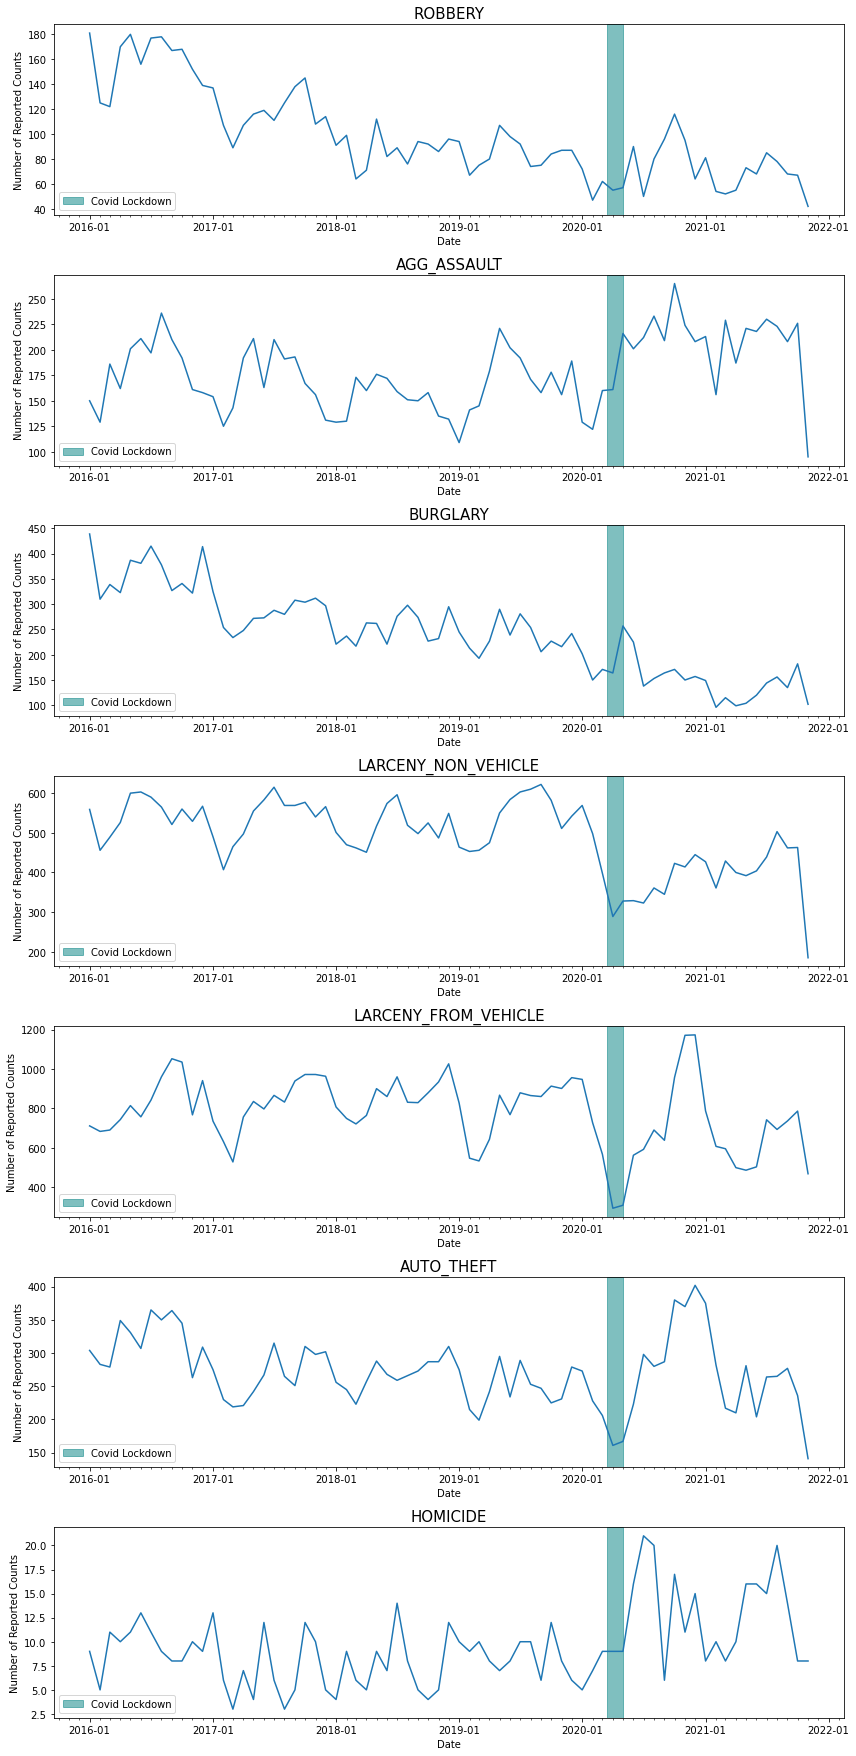

In [230]:
fig, ax = plt.subplots(nrows=len(type_crimes), figsize=(12,len(type_crimes)*3.5))
for i in type_crimes:
    ind = type_crimes.index(i)
    filt = all_type_crimes_df['Crime Categories'] == i #filter the dataframe for each type in the list
    ax[ind].set_title(i, size=15)
    ax[ind].plot(all_type_crimes_df.loc[filt]['yyyy-mm'],all_type_crimes_df.loc[filt]['count'])
    ax[ind].set_ylabel('Number of Reported Counts', fontsize = 10)
    ax[ind].set_xlabel('Date', fontsize = 10)
    ax[ind].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax[ind].xaxis.set_minor_locator(mdates.MonthLocator())
    ax[ind].axvspan(dt.datetime(2020,3,15), dt.datetime(2020,4,30), color='teal', alpha=0.5, label="Covid Lockdown")
    ax[ind].legend(loc='lower left')
    plt.tight_layout()
    #plt.savefig('images/Crime Categories subplots updated (2016-2021)', dpi=100)
